# Q(1.1) Implementation of Salt and Pepper Noise to Image with OpenCV in Python

### Impoting required Libraries

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import numpy as np
import cv2

# Creating function to add salt and pepper noise

In [2]:
def addSaltandPepperNoise(inputImg):
    # taking image dimensions
    row, col = inputImg.shape
    #picking some pixels in the input image to color them white (salt)
    numberOfPixels = random.randint(100 , 100000)
    for i in range(numberOfPixels):
        
        #taking random y coordinate
        yCoordinate = random.randint(0, row-1)
        
        #taking random c coordinate 
        xCoordinate = random.randint(0, col-1)
        
        # coloring the pixels to white(salt)
        
        inputImg[yCoordinate,xCoordinate] = 255
    # picking some pixels randomly in the input image to color them black (pepper)
    numberOfPixels = random.randint(100 , 100000)
    for i in range(numberOfPixels):
        
        #taking random y coordinate
        yCoordinate = random.randint(0, row-1)
        
        #taking random c coordinate 
        xCoordinate = random.randint(0, col-1)
        
        # coloring the pixels to black(papper)
        
        inputImg[yCoordinate,xCoordinate] = 0
        
    return inputImg         
        

# Creating function to REMOVE salt and pepper noise

In [3]:
def median_filter(inputimgData, filter_size):
    temp = []
    indexer = filter_size // 2
    outputData_final = []
    outputData_final = np.zeros((len(inputimgData),len(inputimgData[0])))
    for i in range(len(inputimgData)):

        for j in range(len(inputimgData[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(inputimgData) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(inputimgData[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(inputimgData[i + z - indexer][j + k - indexer])

            temp.sort()
            outputData_final[i][j] = temp[len(temp) // 2]
            temp = []
    return outputData_final

# adding and removing Impulse or salt and papper noise to image1

Text(0.5, 1.0, 'After Denoising')

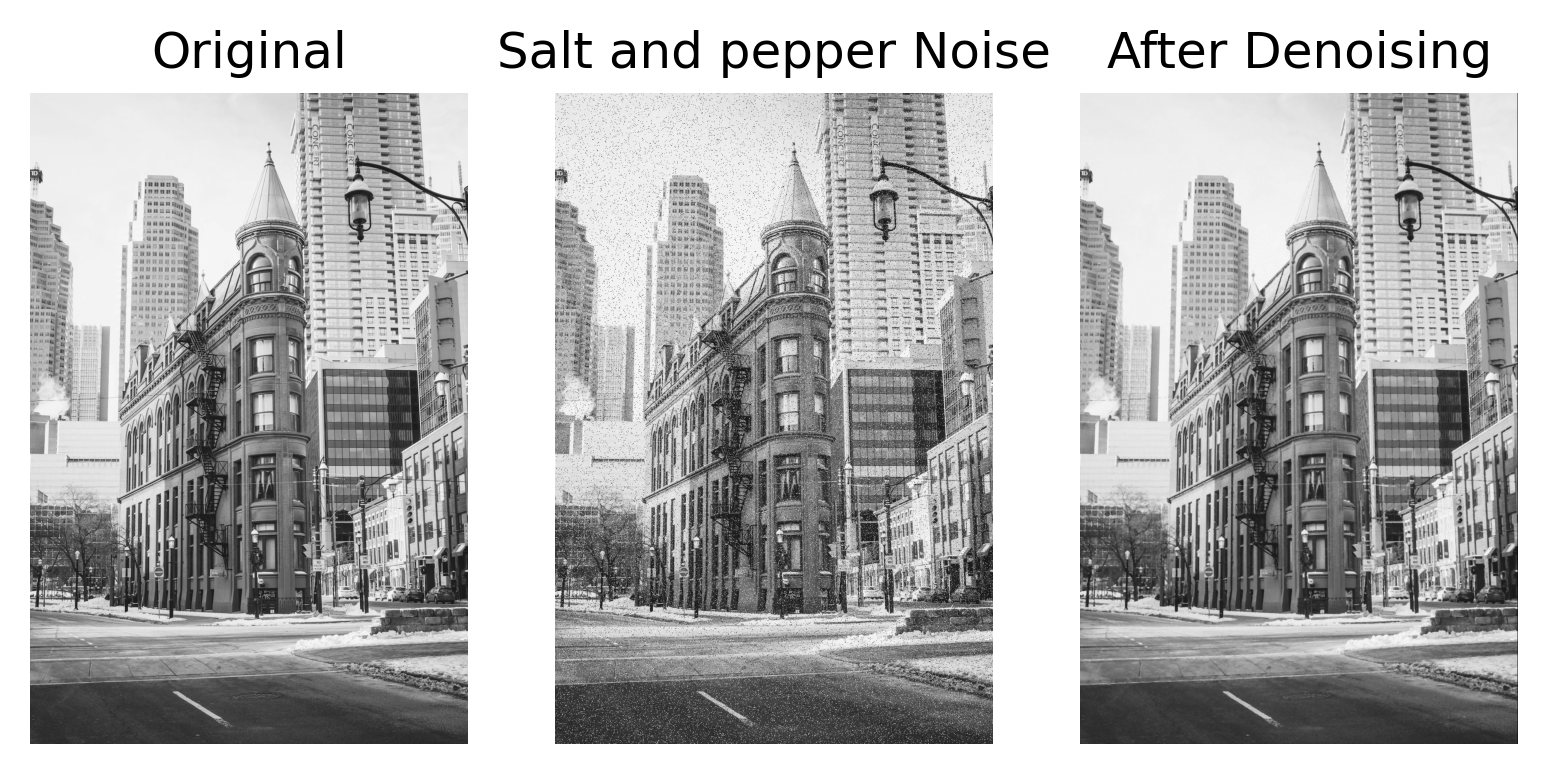

In [4]:
readImg = cv2.imread('image1.jpg',cv2.IMREAD_GRAYSCALE)
cv2.imwrite('salt-and-pepper-image1.jpg',
            addSaltandPepperNoise(readImg))

img=cv2.imread("image1.jpg",0)
sp_img = cv2.imread('salt-and-pepper-image1.jpg')

# removing noise
#sp_denoised= cv2.medianBlur(sp_img, 3)
#cv2.imwrite('denoised_image1.jpg',sp_denoised)

# removing noise
img = Image.open("salt-and-pepper-image1.jpg").convert(
        "L")
arr = np.array(img)
removed_noise = median_filter(arr, 3) 
sp_denoised = Image.fromarray(removed_noise)

sp_denoised = sp_denoised.convert("L")
sp_denoised.save('SP_denoised_image1.jpg')
#cv2.imwrite('denoised_image2.jpg',sp_denoised)
inputImg = cv2.imread('image1.jpg',cv2.IMREAD_GRAYSCALE)
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(inputImg,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(sp_img,cmap='gray')
plt.axis("off")
plt.title("Salt and pepper Noise")

fig.add_subplot(1,3,3)
plt.imshow(sp_denoised,cmap='gray')
plt.axis("off")
plt.title("After Denoising")

# adding and removing Impulse or salt and papper noise to image2

Text(0.5, 1.0, 'After Denoising')

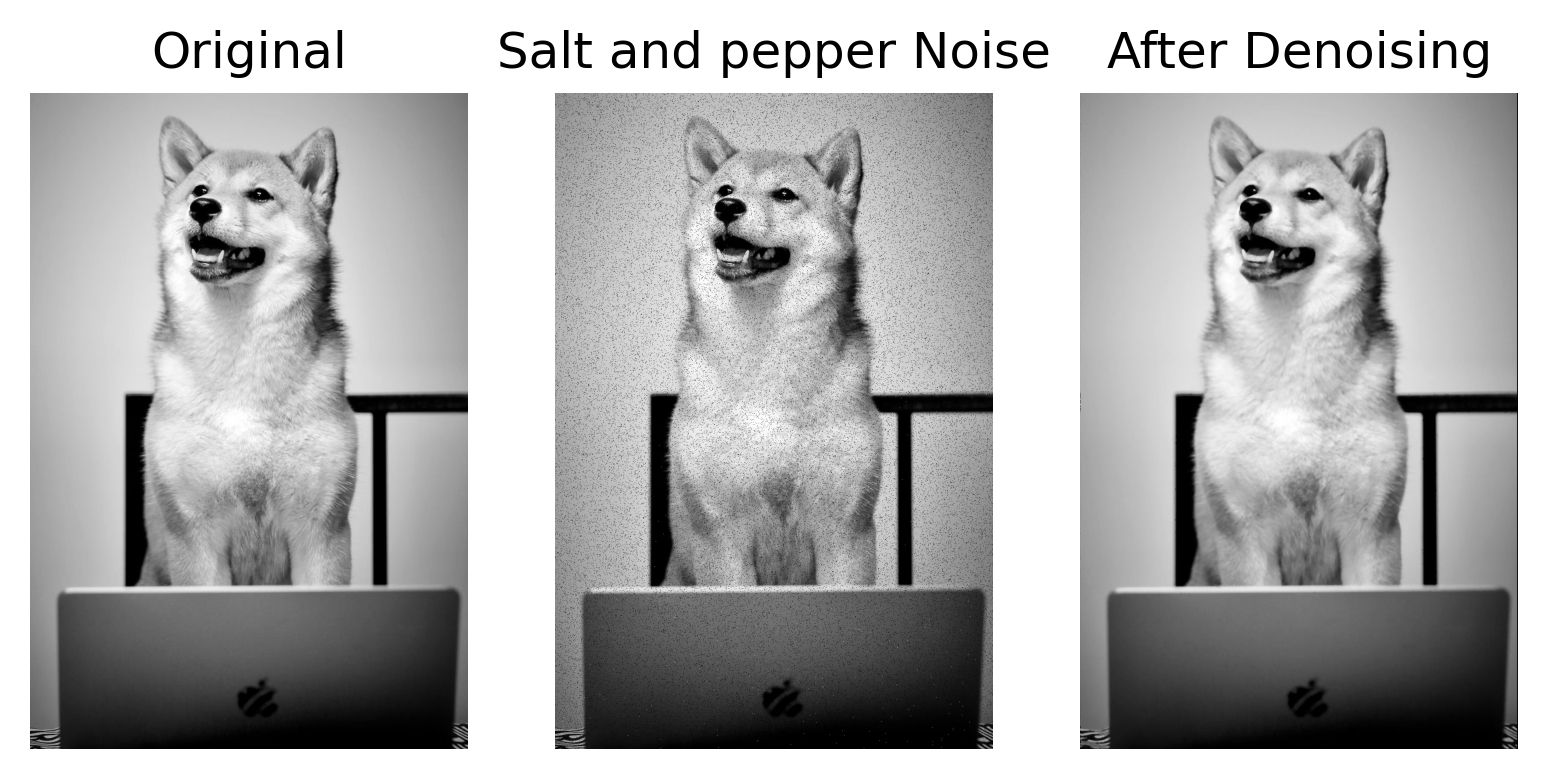

In [5]:
readImg = cv2.imread('image2.jpg',cv2.IMREAD_GRAYSCALE)
cv2.imwrite('salt-and-pepper-image2.jpg',
            addSaltandPepperNoise(readImg))

img=cv2.imread("image1.jpg",0)
sp_img = cv2.imread('salt-and-pepper-image2.jpg')

# removing noise
#sp_denoised= cv2.medianBlur(sp_img, 3)
#cv2.imwrite('denoised_image1.jpg',sp_denoised)

# removing noise
img = Image.open("salt-and-pepper-image2.jpg").convert(
        "L")
arr = np.array(img)
removed_noise = median_filter(arr, 5) 
sp_denoised = Image.fromarray(removed_noise)

sp_denoised = sp_denoised.convert("L")
sp_denoised.save('SP_denoised_image2.jpg')
#cv2.imwrite('denoised_image2.jpg',sp_denoised)
inputImg = cv2.imread('image2.jpg',cv2.IMREAD_GRAYSCALE)
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(inputImg,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(sp_img,cmap='gray')
plt.axis("off")
plt.title("Salt and pepper Noise")

fig.add_subplot(1,3,3)
plt.imshow(sp_denoised,cmap='gray')
plt.axis("off")
plt.title("After Denoising")

# Q (1.2) Implementation of Gaussian Noise to Image with OpenCV in Python

# Creating function to add gaussian noise

In [6]:
# create gaussian noise
def addGaussianNoise(inputImg):
    row, col = inputImg.shape
    mean = 0
    var = 0.001
    sigma = np.sqrt(var)
    n = np.random.normal(loc=mean, scale=sigma, size=(row,col))
    img_noise = inputImg + n
    return img_noise



# Creating function to remove gaussian noise

In [7]:
## denoise image
# median filter (average)
from skimage import img_as_ubyte
def removeNoise(img_noise):
    m = 5
    n = 5
    denoise_mean = cv2.blur(img_noise, (m,n))
    # median filter
    img_noise_median = np.clip(img_noise, -1, 1) #pixel value range
    img_noise_median = img_as_ubyte(img_noise_median) #convert to uint8
    denoise_median = cv2.medianBlur(img_noise_median, 5)
    return denoise_median

# adding and removing gaussian noise to image1

Text(0.5, 1.0, 'Gaussian DeNoise')

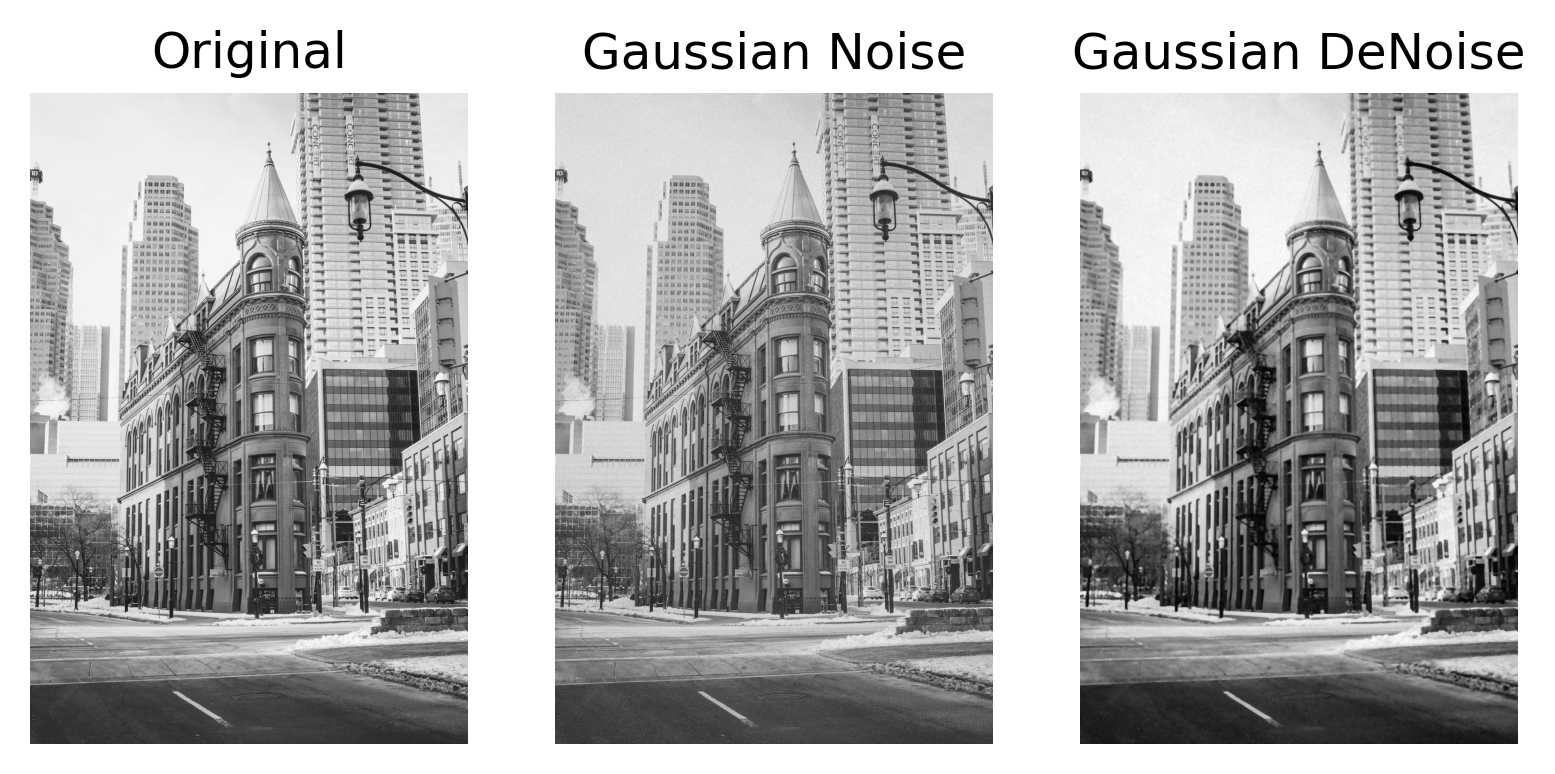

In [8]:
input_img = cv2.imread('image1.jpg', 0)
input_img = input_img/input_img.max()

gn_img = addGaussianNoise(input_img)
cv2.imwrite('GaussianNoise_image1.jpg',
            gn_img)
gn_denoised = removeNoise(gn_img) 
cv2.imwrite('Gaussian_DeNoise_image1.jpg',
            gn_denoised)

fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(input_img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")
fig.add_subplot(1,3,3)
plt.imshow(gn_denoised,cmap='gray')
plt.axis("off")
plt.title("Gaussian DeNoise")

# adding and removing gaussian noise to image2

Text(0.5, 1.0, 'Gaussian DeNoise')

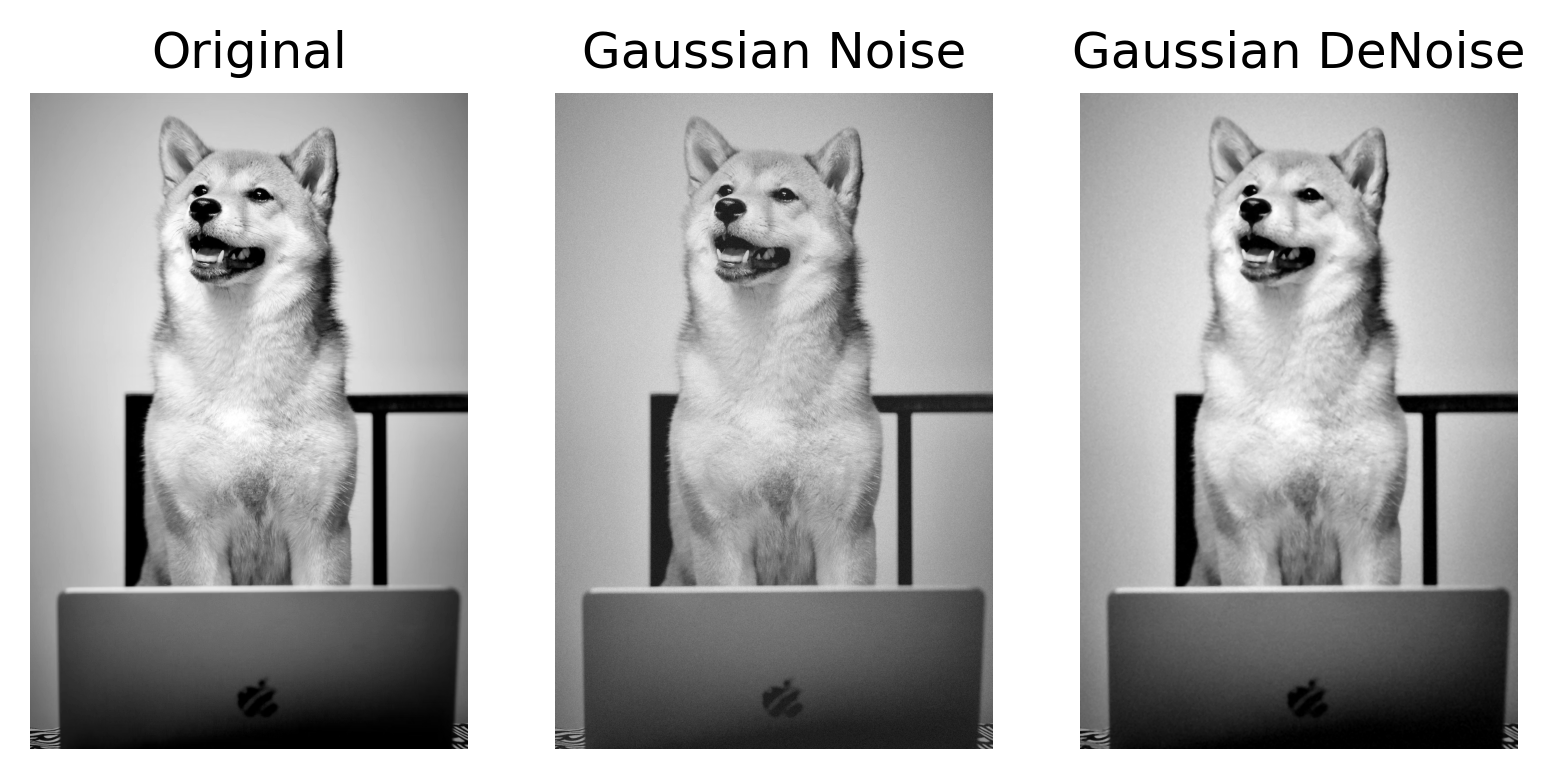

In [9]:
input_img = cv2.imread('image2.jpg', 0)
input_img = input_img/input_img.max()

gn_img = addGaussianNoise(input_img)
cv2.imwrite('GaussianNoise_image2.jpg',
            gn_img)
gn_denoised = removeNoise(gn_img) 
cv2.imwrite('Gaussian_DeNoise_image2.jpg',
            gn_denoised)

fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(input_img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")
fig.add_subplot(1,3,3)
plt.imshow(gn_denoised,cmap='gray')
plt.axis("off")
plt.title("Gaussian DeNoise")